In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
sentence_data = pd.read_excel('/home/niya/collegeML/CollegeML/lab4/ML-lab3 (1).xlsx')
def train_linear_regression(features,targets):
    #training the model using Linear Regression
    model = LinearRegression().fit(features,targets)
    return model
#making prediction on training data using model
def predict_values(model,features):
    predicated_values = model.predict(features)
    return predicated_values
def calculate_metrics(true_values,pred_values):
    #calculating metrics
    mse = mean_squared_error(true_values,pred_values)
    rmse = np.sqrt(mse)
    # Removes zero values to avoid division by zero in MAPE
    nonzero = true_values != 0
    mape = np.mean(np.abs((true_values[nonzero] - pred_values[nonzero]) / true_values[nonzero])) * 100 if np.any(nonzero) else np.nan
    r2 = r2_score(true_values,pred_values)
    return mse,rmse,mape,r2
def main():
    #No_of_words column is considered feature and 'No_of_questioning_words' column is considered as target
    #reshaping the data to fit in linear regression
    feature_values = sentence_data["No_of_words"].values.reshape(-1, 1)
    target_values = sentence_data["No_of_questoning_words"].values
    # Preparing the training and testing data using 'No_of_words' as feature and 'No_of_questioning_words' as target
    feature_values_train,feature_values_test,target_values_train,target_values_test = train_test_split(feature_values,target_values,test_size=0.2,random_state=42)
    # Training the data using Linear Regression model
    model = train_linear_regression(feature_values_train,target_values_train)
    #predicted values
    train_values_pred=predict_values(model,feature_values_train)
    test_values_pred=predict_values(model,feature_values_test)
    print("Actual Values of Training data:")
    print(target_values_train)
    print()
    print("Predicted values of Training Data:\n", train_values_pred)
    print()
    print("Actual Values of Testing data:")
    print(target_values_test)
    print()
    print("Predicted values of Testing Data:\n", test_values_pred)
    # Calculating metrics for training and testing data
    train_mse,train_rmse,train_mape,train_r2=calculate_metrics(target_values_train,train_values_pred)
    print("TRAIN METRICS:")
    print(f"Mean Squared Error: {train_mse:.4f}")
    print(f"Root Mean Squared Error: {train_rmse:.4f}")
    print(f"Mean Absolute Percentage Error: {train_mape:.4f}%")
    print(f"R-squared: {train_r2:.4f}")
    test_mse,test_rmse,test_mape,test_r2=calculate_metrics(target_values_test,test_values_pred)
    print("\nTEST METRICS:")
    print(f"Mean Squared Error: {test_mse:.4f}")
    print(f"Root Mean Squared Error: {test_rmse:.4f}")
    print(f"Mean Absolute Percentage Error: {test_mape:.4f}%")
    print(f"R-squared: {test_r2:.4f}")
if __name__ == "__main__":
    main()


Actual Values of Training data:
[2 1 1 1 2 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 2 0 0 0 1 0 0 1 0 1 1 2 0 2
 0 0 1 1 0 1 0 0 0 0 0 2 1 2 0 0 3 0 2 1 1 2 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 2 2 1 1 1 0 3 0 1 0 0 0 1 0 0 0 0 0 2 0 0 1 0 2 0 0 0 0 0
 1 3 1 2 1 1 0 1 1 0 0 0 0 1 0 0 0 0 2 0 0 1 1 0 1 1 2 0 0 1 1 0 0 5 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 0 3 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 2 0 0 1 0 1 0 2 0
 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 3 1 1 1 0 1 2 0 2 1 0 1 1 0 0
 1 2 0 0 1 1 0 1 1 1 2 8 1 0 1 1 0 0 2 0 0 1 1 0 1 0 0 0 3 1 0 0 1 0 1 0 0
 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 3 1 0 0 1 1 0 0
 3 0 0 1 0 3 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 2 0 1 1 1 1 0 0 2 1 0 1 0 0 0 0
 6 5 1 0 0 0 2 0 0 1 0 1 1 1 0 1 0 2 0 1 0 0 1 0 0 0 1 2 0 0 1 0 0 0 0 1 0
 2 3 0 0 1 0 0 0 1 0 3 2 4 2 0 2 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 3 1 0
 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 2 1 1 1 1 1 1 0 0 0 0

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack,csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
sentence_data = pd.read_excel('/home/niya/collegeML/CollegeML/lab4/ML-lab3 (1).xlsx')

def train_linear_regression(features,targets):
    #training the model using Linear Regression
    model = LinearRegression().fit(features,targets)
    return model
#making prediction on training data using model
def predict_values(model,features):
    predicated_values = model.predict(features)
    return predicated_values
def calculate_metrics(true_values,pred_values):
    #calculating metrics
    mse = mean_squared_error(true_values,pred_values)
    rmse = np.sqrt(mse)
    # Removes zero values to avoid division by zero in MAPE
    nonzero = true_values != 0
    mape = np.mean(np.abs((true_values[nonzero] - pred_values[nonzero]) / true_values[nonzero])) * 100 if np.any(nonzero) else np.nan
    r2 = r2_score(true_values,pred_values)
    return mse,rmse,mape,r2
def main():
    feature_values = sentence_data[["No_of_words","Has_Question_Mark", "label"]].values
    target_values = sentence_data["No_of_questoning_words"].values
    # Splits the data into training and testing sets
    feature_values_train,feature_values_test,target_values_train,target_values_test = train_test_split(feature_values,target_values,test_size=0.2,random_state=42)
    # Training the data using Linear Regression model
    model = train_linear_regression(feature_values_train,target_values_train)
    #predicted values
    train_values_pred=predict_values(model,feature_values_train)
    test_values_pred=predict_values(model,feature_values_test)
    print("Actual Values of Training data:")
    print(target_values_train)
    print()
    print("Predicted values of Training Data:\n", train_values_pred)
    print()
    print("Actual Values of Testing data:")
    print(target_values_test)
    print()
    print("Predicted values of Testing Data:\n", test_values_pred)
    # Calculating metrics for training and testing data
    train_mse,train_rmse,train_mape,train_r2=calculate_metrics(target_values_train,train_values_pred)
    print("TRAIN METRICS:")
    print(f"Mean Squared Error: {train_mse:.4f}")
    print(f"Root Mean Squared Error: {train_rmse:.4f}")
    print(f"Mean Absolute Percentage Error: {train_mape:.4f}%")
    print(f"R-squared: {train_r2:.4f}")
    test_mse,test_rmse,test_mape,test_r2=calculate_metrics(target_values_test,test_values_pred)
    print("\nTEST METRICS:")
    print(f"Mean Squared Error: {test_mse:.4f}")
    print(f"Root Mean Squared Error: {test_rmse:.4f}")
    print(f"Mean Absolute Percentage Error: {test_mape:.4f}%")
    print(f"R-squared: {test_r2:.4f}")
if __name__ == "__main__":
    main()


Actual Values of Training data:
[2 1 1 1 2 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 2 0 0 0 1 0 0 1 0 1 1 2 0 2
 0 0 1 1 0 1 0 0 0 0 0 2 1 2 0 0 3 0 2 1 1 2 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 2 2 1 1 1 0 3 0 1 0 0 0 1 0 0 0 0 0 2 0 0 1 0 2 0 0 0 0 0
 1 3 1 2 1 1 0 1 1 0 0 0 0 1 0 0 0 0 2 0 0 1 1 0 1 1 2 0 0 1 1 0 0 5 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 0 3 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 2 0 0 1 0 1 0 2 0
 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 3 1 1 1 0 1 2 0 2 1 0 1 1 0 0
 1 2 0 0 1 1 0 1 1 1 2 8 1 0 1 1 0 0 2 0 0 1 1 0 1 0 0 0 3 1 0 0 1 0 1 0 0
 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 3 1 0 0 1 1 0 0
 3 0 0 1 0 3 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 2 0 1 1 1 1 0 0 2 1 0 1 0 0 0 0
 6 5 1 0 0 0 2 0 0 1 0 1 1 1 0 1 0 2 0 1 0 0 1 0 0 0 1 2 0 0 1 0 0 0 0 1 0
 2 3 0 0 1 0 0 0 1 0 3 2 4 2 0 2 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 3 1 0
 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 2 1 1 1 1 1 1 0 0 0 0

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack,csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
sentence_data = pd.read_excel('/home/niya/collegeML/CollegeML/lab4/ML-lab3 (1).xlsx')
def train_linear_regression(features,targets):
    #training the model using Linear Regression
    model = LinearRegression().fit(features,targets)
    return model
#making prediction on training data using model
def predict_values(model,features):
    predicated_values = model.predict(features)
    return predicated_values
def calculate_metrics(true_values,pred_values):
    #calculating metrics
    mse = mean_squared_error(true_values,pred_values)
    rmse = np.sqrt(mse)
    # Removes zero values to avoid division by zero in MAPE
    nonzero = true_values != 0
    mape = np.mean(np.abs((true_values[nonzero] - pred_values[nonzero]) / true_values[nonzero])) * 100 if np.any(nonzero) else np.nan
    r2 = r2_score(true_values,pred_values)
    return mse,rmse,mape,r2
def main():
    numerical_data = sentence_data[["No_of_words","Has_Question_Mark", "label"]].values
    target_values = sentence_data["No_of_questoning_words"].values
    #TF-IDF vectorization for categorical for feature extraction
    tfidf_vectorizer = TfidfVectorizer()
    text = tfidf_vectorizer.fit_transform(sentence_data["Text"])
    numerical_data = sentence_data.iloc[:,1 :-1].values
    labels = sentence_data['label'].values
    # Combines text features with numerical data
    combined_features = hstack([text,csr_matrix(numerical_data)])
    # Splits the data into training and testing sets
    feature_values_train,feature_values_test,target_values_train,target_values_test = train_test_split(combined_features,target_values,test_size=0.2,random_state=42)
    # Training the data using Linear Regression model
    model = train_linear_regression(feature_values_train,target_values_train)
    #predicted values
    train_values_pred=predict_values(model,feature_values_train)
    test_values_pred=predict_values(model,feature_values_test)
    print("Actual Values of Training data:")
    print(target_values_train)
    print()
    print("Predicted values of Training Data:\n", train_values_pred)
    print()
    print("Actual Values of Testing data:")
    print(target_values_test)
    print()
    print("Predicted values of Testing Data:\n", test_values_pred)
    # Calculating metrics for training and testing data
    train_mse,train_rmse,train_mape,train_r2=calculate_metrics(target_values_train,train_values_pred)
    print()
    print("TRAIN METRICS:")
    print(f"Mean Squared Error: {train_mse:.4f}")
    print(f"Root Mean Squared Error: {train_rmse:.4f}")
    print(f"Mean Absolute Percentage Error: {train_mape:.4f}%")
    print(f"R-squared: {train_r2:.4f}")
    test_mse,test_rmse,test_mape,test_r2=calculate_metrics(target_values_test,test_values_pred)
    print("\nTEST METRICS:")
    print(f"Mean Squared Error: {test_mse:.4f}")
    print(f"Root Mean Squared Error: {test_rmse:.4f}")
    print(f"Mean Absolute Percentage Error: {test_mape:.4f}%")
    print(f"R-squared: {test_r2:.4f}")
if __name__ == "__main__":
    main()


Actual Values of Training data:
[2 1 1 1 2 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 2 0 0 0 1 0 0 1 0 1 1 2 0 2
 0 0 1 1 0 1 0 0 0 0 0 2 1 2 0 0 3 0 2 1 1 2 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 2 2 1 1 1 0 3 0 1 0 0 0 1 0 0 0 0 0 2 0 0 1 0 2 0 0 0 0 0
 1 3 1 2 1 1 0 1 1 0 0 0 0 1 0 0 0 0 2 0 0 1 1 0 1 1 2 0 0 1 1 0 0 5 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 0 3 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 2 0 0 1 0 1 0 2 0
 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 3 1 1 1 0 1 2 0 2 1 0 1 1 0 0
 1 2 0 0 1 1 0 1 1 1 2 8 1 0 1 1 0 0 2 0 0 1 1 0 1 0 0 0 3 1 0 0 1 0 1 0 0
 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 3 1 0 0 1 1 0 0
 3 0 0 1 0 3 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 2 0 1 1 1 1 0 0 2 1 0 1 0 0 0 0
 6 5 1 0 0 0 2 0 0 1 0 1 1 1 0 1 0 2 0 1 0 0 1 0 0 0 1 2 0 0 1 0 0 0 0 1 0
 2 3 0 0 1 0 0 0 1 0 3 2 4 2 0 2 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 3 1 0
 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 2 1 1 1 1 1 1 0 0 0 0

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from scipy.sparse import hstack, csr_matrix
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
def k_mean_clustering(features,k_value):
    #Performs K-means clustering
    #k_value defines the no.of cluster we are labeling
    kmeans = KMeans(n_clusters=k_value, random_state=0, n_init='auto').fit(features)
    #labeling
    labels = kmeans.labels_
    #clusters centers calculation
    cluster_centers = kmeans.cluster_centers_
    return labels,cluster_centers
def calculates_clustering_metrics(features, labels):
    #Calculating Silhouette Score, Calinski-Harabasz Score, and Davies-Bouldin Index
    silhouette = silhouette_score(features, labels)
    # Converting sparse matrix to dense array as it calinski-Harabasz, davies_bouldin takes dense array as input
    features = features.toarray()
    calinski_harabasz = calinski_harabasz_score(features, labels)
    davies_bouldin = davies_bouldin_score(features, labels)
    return silhouette, calinski_harabasz, davies_bouldin
def main():
    sentence_data = pd.read_excel('/home/niya/collegeML/CollegeML/lab4/ML-lab3 (1).xlsx')

    numerical_data = sentence_data[['No_of_words', 'No_of_questoning_words', 'Has_Question_Mark']].values
    #TF-IDF vectorization for categorical for feature extraction
    tfidf_vectorizer = TfidfVectorizer()
    text = tfidf_vectorizer.fit_transform(sentence_data["Text"])
    # Combines text features with numerical data
    combined_features = hstack([text,csr_matrix(numerical_data)])
    #k_value=2
    labels,cluster_centers=k_mean_clustering(combined_features,2)
    print("CLUSTER LABELS:\n", labels)
    print()
    print("CLUSTER CENTERS:\n", cluster_centers)
    # Calculating and printing clustering metrics
    silhouette, calinski_harabasz, davies_bouldin = calculates_clustering_metrics(combined_features, labels)
    print("\nCLUSTERING METRICS:")
    print("Silhouette Score: ",silhouette)
    print("Calinski-Harabasz Score: ",calinski_harabasz)
    print("Davies-Bouldin Index: ",davies_bouldin)
if __name__ == "__main__":
    main()

CLUSTER LABELS:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0

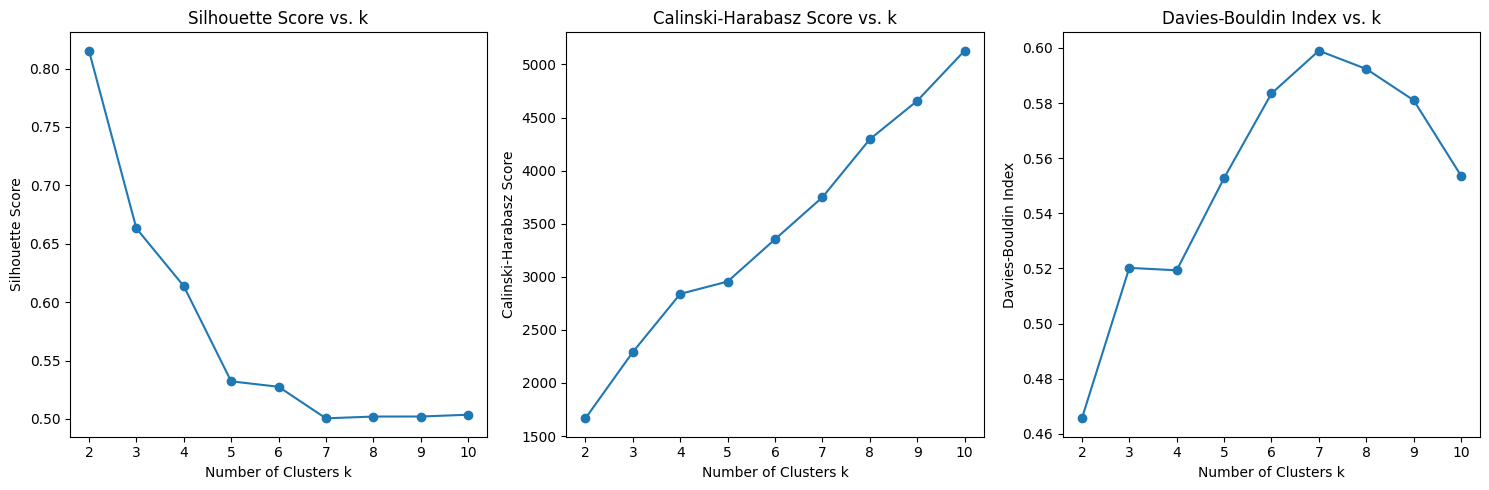

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from scipy.sparse import hstack, csr_matrix
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
def k_mean_clustering(features,k_value):
    #Performs K-means clustering
    #k_value defines the no.of cluster we are labeling
    kmeans = KMeans(n_clusters=k_value, random_state=0, n_init='auto').fit(features)
    #labeling
    labels = kmeans.labels_
    return labels
def calculates_clustering_metrics(features, labels):
    #Calculating Silhouette Score, Calinski-Harabasz Score, and Davies-Bouldin Index
    silhouette = silhouette_score(features, labels)
    # Converting sparse matrix to dense array as it calinski-Harabasz, davies_bouldin takes dense array as input
    features = features.toarray()
    calinski_harabasz = calinski_harabasz_score(features, labels)
    davies_bouldin = davies_bouldin_score(features, labels)
    return silhouette, calinski_harabasz, davies_bouldin
def main():
    sentence_data = pd.read_excel('/home/niya/collegeML/CollegeML/lab4/ML-lab3 (1).xlsx')
    # Extracting numerical data
    numerical_data = sentence_data[['No_of_words', 'No_of_questoning_words', 'Has_Question_Mark']].values
    # TF-IDF vectorization for text data
    tfidf_vectorizer = TfidfVectorizer()
    text = tfidf_vectorizer.fit_transform(sentence_data["Text"])
    # Combining text features with numerical data
    combined_features = hstack([text, csr_matrix(numerical_data)])
    # Defining a range of k values
    k_values = range(2,11)
    silhouette_scores = []
    calinski_harabasz_scores = []
    davies_bouldin_scores = []
    # Perform K-means clustering for different values of k
    for k in k_values:
        labels = k_mean_clustering(combined_features, k)
        silhouette, calinski_harabasz, davies_bouldin = calculates_clustering_metrics(combined_features, labels)
        silhouette_scores.append(silhouette)
        calinski_harabasz_scores.append(calinski_harabasz)
        davies_bouldin_scores.append(davies_bouldin)
    # Plotting the scores
    plt.figure(figsize=(15, 5))
    # Silhouette Score Plot
    plt.subplot(1, 3, 1)
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.title('Silhouette Score vs. k')
    plt.xlabel('Number of Clusters k')
    plt.ylabel('Silhouette Score')
    # Calinski-Harabasz Score Plot
    plt.subplot(1, 3, 2)
    plt.plot(k_values, calinski_harabasz_scores, marker='o')
    plt.title('Calinski-Harabasz Score vs. k')
    plt.xlabel('Number of Clusters k')
    plt.ylabel('Calinski-Harabasz Score')
    # Davies-Bouldin Index Plot
    plt.subplot(1, 3, 3)
    plt.plot(k_values, davies_bouldin_scores, marker='o')
    plt.title('Davies-Bouldin Index vs. k')
    plt.xlabel('Number of Clusters k')
    plt.ylabel('Davies-Bouldin Index')
    plt.tight_layout()
    plt.show()
if __name__ == "__main__":
    main()


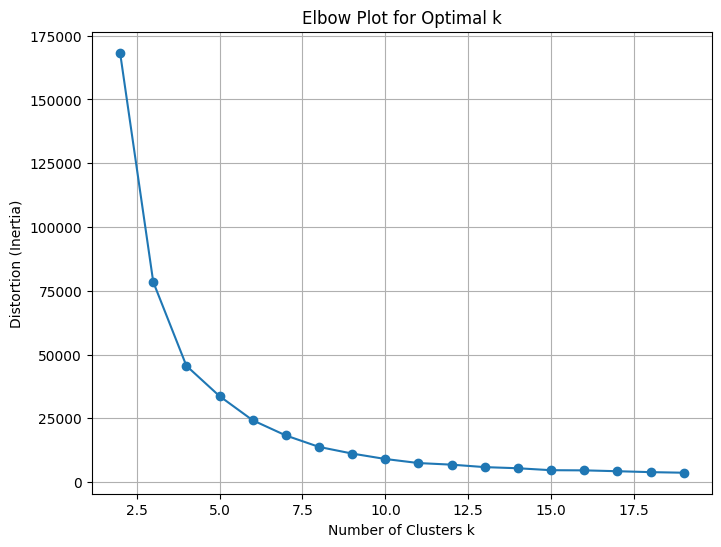

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from scipy.sparse import hstack, csr_matrix
import matplotlib.pyplot as plt
def k_mean_clustering(features, k_value):
    # Performs K-means clustering
    kmeans = KMeans(n_clusters=k_value, random_state=0, n_init='auto').fit(features)
    labels = kmeans.labels_
    # Calculates the inertia
    inertia = kmeans.inertia_
    return inertia
def main():
    sentence_data = pd.read_excel('/home/niya/collegeML/CollegeML/lab4/ML-lab3 (1).xlsx')
    # Extracting numerical data
    numerical_data = sentence_data[['No_of_words', 'No_of_questoning_words', 'Has_Question_Mark']].values
    # TF-IDF vectorization for text data
    tfidf_vectorizer = TfidfVectorizer()
    text = tfidf_vectorizer.fit_transform(sentence_data["Text"])
    # Combining text features with numerical data
    combined_features = hstack([text, csr_matrix(numerical_data)])
    # Calculates distortions (inertia) for a range of k values
    k_values = range(2, 20)
    distortions = []
    for k in k_values:
        inertia = k_mean_clustering(combined_features, k)
        distortions.append(inertia)
    # Plotting the Elbow plot
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, distortions, marker='o')
    plt.title('Elbow Plot for Optimal k')
    plt.xlabel('Number of Clusters k')
    plt.ylabel('Distortion (Inertia)')
    plt.grid(True)
    plt.show()
if __name__ == "__main__":
    main()